<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Machine Learning Foundation***

## ***Logistic Regression***


$ \ $

## ***Introduction***

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01) database, which was built from the recordings of study participants who carried a smartphone with an embedded inertial sensor while performing activities of daily living (ADL). The objective is to classify the activities that the participants performed into one of the six following categories: 

* walking, 

* walking upstairs, 

* walking downstairs, 

* sitting, 

* standing, 

* laying.

The following information is provided for each record in the dataset:

*   triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration

*   triaxial Angular velocity from the gyroscope

*   a 561-feature vector with time and frequency domain variables


*   the activity label

More information about the features are available on the website linked above.


$ \ $

----

## ***Package importing***

In the following lines, we import the necessary libraries.

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
import seaborn as sns, pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
%matplotlib inline

$ \ $

---

## ***Question $(1)$***

$ \ $

$(1)$ Import the data.

In [63]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,WALKING_UPSTAIRS


$ \ $

$(2)$ The data columns are all floats except for the activity label. Examine the data types. There are many columns, so it might be wise (sabi@) to use value counts.


In [4]:
data.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

In [5]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

$ \ $

$(3)$ The data are all scaled from $-1$ (minimum) to $1$ (maximum).

In [6]:
# tomamos todas las columnas del dataframe, excepto por la ultima, luego determinamos el valor minimo y miramos cuantas veces se repite
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [7]:
# tomamos todas las columnas del dataframe, excepto por la ultima, luego determinamos el valor maximo de cada columna y miramos cuantas veces se repite
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

In [8]:
data.iloc[:, :-1] 

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [9]:
data.iloc[:, :-1].max()

tBodyAcc-mean()-X                       1.0
tBodyAcc-mean()-Y                       1.0
tBodyAcc-mean()-Z                       1.0
tBodyAcc-std()-X                        1.0
tBodyAcc-std()-Y                        1.0
                                       ... 
angle(tBodyGyroMean,gravityMean)        1.0
angle(tBodyGyroJerkMean,gravityMean)    1.0
angle(X,gravityMean)                    1.0
angle(Y,gravityMean)                    1.0
angle(Z,gravityMean)                    1.0
Length: 561, dtype: float64

$ \ $

$(4)$ Examine the breakdown of activities; they are relatively balanced.

In [10]:
data["Activity"].value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

$ \ $

-----

## ***Note (Scikit learn classifiers).***

Scikit learn classifiers won't accept a sparse  matrix (matriz dispersa) for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array (arreglo rectangular no disperso). 

$ \ $

$(1)$ Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
# creamos un modelo de tipo LabelEncoder()
le = LabelEncoder()

# entrenamos el modelo LabelEncoder() creado previamente sobre la data["Activity"] y este resultado es asignado a la columna 'Activity' del dataframe data
data["Activity"] = le.fit_transform(data["Activity"])

# mostramos en pantalla la descripcion de la columna 
data["Activity"].sample(5)

9       2
2979    3
7019    1
2620    0
7764    3
Name: Activity, dtype: int64

$ \ $

----

## ***Question $(2)$***


$ \ $

$(1)$  Calculate the correlations between the dependent variables.



In [64]:
# describimos todo el dataframe data excepto la ultima columna "Activity"
feature_cols = data.columns[:-1]

# describimos la correlacion de las columnas escogidas del datafram
corr_values = data[feature_cols].corr()

In [65]:
corr_values.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,0.004590,-0.046352,-0.024185,1.000000,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,-0.016785,-0.046996,-0.023745,0.922525,1.000000,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511


$ \ $

$(2)$ Calculate the correlations between the dependent variables (without repetitions).

In [48]:
# mostraos el actual dataframe que muestra las correlaciones
corr_values

,feature1,feature2,correlation,abs_correlation
0,NaN,tBodyAcc-mean()-Y,0.128037,0.128037
1,NaN,NaN,-0.230302,0.230302
2,NaN,NaN,NaN,0.004590
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582,0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549,0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249,0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231,0.635231


In [68]:
# Este proceso nos recupera los indices de la matriz triangular inferior (i,j) con i>=j
tril_index = np.tril_indices_from(corr_values)
tril_index

(array([  0,   1,   1, ..., 560, 560, 560]),
 array([  0,   0,   1, ..., 558, 559, 560]))

In [69]:
def Zip(X,Y):  
  if len(X) == len(Y):
    Zip = []
    for i in range(len(X)):
      Zip.append((X[i], Y[i]))
    return Zip

# El operador "*" desempaqueta una lista o un objeto iterable y luego la función zip toma n listas y crea pares de n-tuplas de cada elemento de ambas listas
# En este caso, hacemos que los elemento abajo de la diagonal principal sean de tipo np.NaN
for coord in Zip(tril_index[0],tril_index[1]):
    corr_values.iloc[coord[0], coord[1]] = np.NaN

In [70]:
# Mostramos nuestro nuevo dataframe correlacion
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,NaN,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,NaN,NaN,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,NaN,NaN,NaN,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,NaN,NaN,NaN,NaN,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,NaN,NaN,NaN,NaN,NaN,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.748249,-0.635231
"angle(Y,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.545614


In [19]:
# Agrupamos los datos (eliminando los datos de tipo NAN) y los convertimos en un dataframe
corr_values = (corr_values
                          .stack()
                          .to_frame()
                          .reset_index()
                          .rename(columns={'level_0': 'feature1', 'level_1': 'feature2', 0: 'correlation'}))

In [20]:
# Creamos una nueva columna, mostrando el valor absoluto del dataframe
corr_values['abs_correlation'] = corr_values["correlation"].abs()

In [21]:
# Este es nuestro resultado final. Un dataframe mostrando las correlaciones sin repeticon
corr_values

,feature1,feature2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582,0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549,0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249,0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231,0.635231


$ \ $

$(3)$ A histogram of the absolute value correlations.


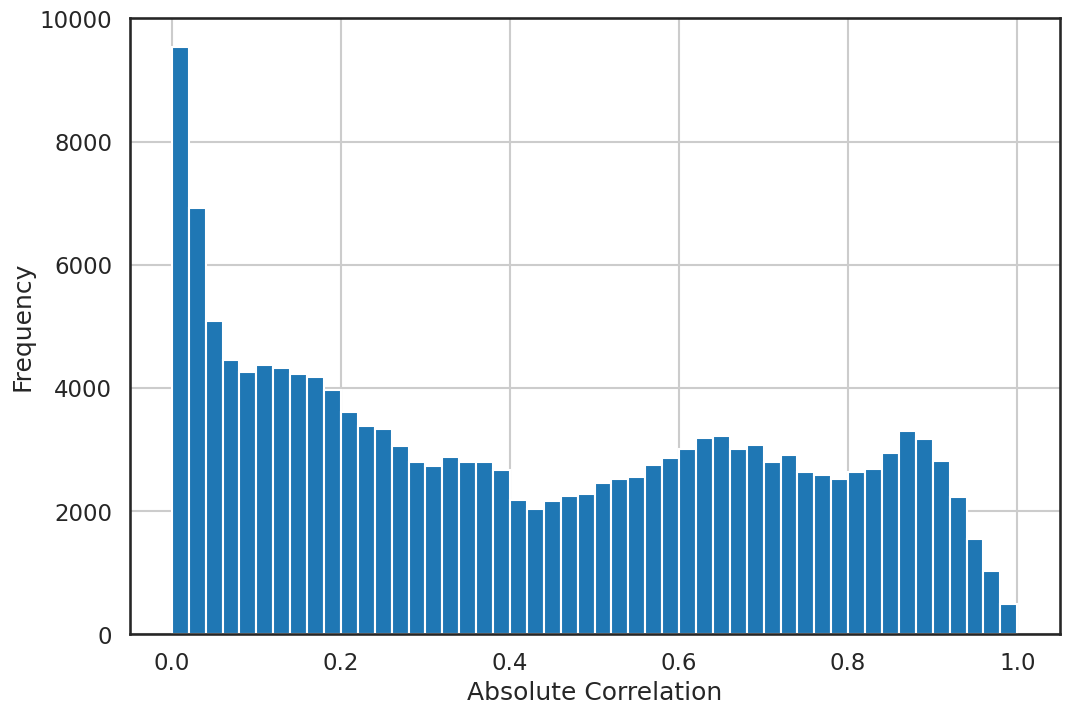

In [22]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values["abs_correlation"].hist(bins = 50, figsize = (12, 8))
ax.set(xlabel = 'Absolute Correlation', ylabel = 'Frequency');

$ \ $


$(4)$  Identify those that are most correlated (either positively or negatively).

In [23]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending = False).query('abs_correlation > 0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


$ \ $

-----

## ***Question $(3)$***

$ \ $

$(1)$   Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.


In [24]:
# Obtenemos los índices divididos. (StratifiedShuffleSplit = División aleatoria estratificada)
strat_shuf_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)

# x = data[feature_cols] and y = data["Activity"]
train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data["Activity"]))

In [25]:
## Datos de entrenamiento

# tomamos los indices de entrenamiento encontrados anteriormente que describen los renglones del dataframe y como columnas tomamos a feature_cols
X_train = data.loc[train_idx, feature_cols]

# tomamos los indices de entrenamiento encontrados anteriormente que describen los renglones del dataframe y como columnas tomamos a 'Activity'
y_train = data.loc[train_idx, 'Activity']

In [26]:
## Datos de prueba

# tomamos los indices de prueba encontrados anteriormente que describen los renglones del dataframe y como columnas tomamos a feature_cols
X_test  = data.loc[test_idx, feature_cols]

# tomamos los indices de prueba encontrados anteriormente que describen los renglones del dataframe y como columnas tomamos a 'Activity'
y_test  = data.loc[test_idx, 'Activity']

$ \ $

$(2)$  Regardless of the method used to split the data, compare the ratio of classes in both the train and test splits.

In [27]:
y_train.value_counts(normalize = True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [28]:
y_test.value_counts(normalize = True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

$ \ $

----


## ***Question $(4)$***

$ \ $

$(1)$   Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output.


In [29]:
# Creamos un objeto de regresion lineal y luego lo entrenamos con la data de entrenamiento
lr = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

$ \ $

$(2)$   Using cross validation to determine the hyperparameters and fit models using $L^1$ and $L^2$ regularization. 

* Store each of these models as well. 

* Note the limitations on multi-class models, solvers, and regularizations.

The regularized models, in particular the $L^1$ model, will probably take a while to fit.

In [30]:
# L1 regresión logística regularizada
lr_l1 = LogisticRegressionCV(Cs = 10, cv = 4, penalty = 'l1', solver = 'liblinear').fit(X_train, y_train)

In [31]:
# L2 regresión logística regularizada
lr_l2 = LogisticRegressionCV(Cs = 10, cv = 4, penalty = 'l2', solver = 'liblinear').fit(X_train, y_train)

$ \ $

----

## ***Question $(5)$***

$ \ $

$(1)$ Compare the magnitudes of the coefficients for each of the models. If ***`one-vs-rest`*** fitting was used, each set of coefficients can be plotted separately.


In [71]:
# Creamos una lista vacia y la llenaremos adecuadamente
coefficients = []

# nombres de los modelos
coeff_labels = ['lr', 'l1', 'l2']

# modelos a tratar
coeff_models = [lr, lr_l1, lr_l2]

# concatenamos los nombres de los modelos con los modelos
zip = Zip(coeff_labels, coeff_models)

In [72]:
# realizamos una iteracion sobre zip
for (name, model) in zip:

    # tomamos los coeficientes del modelo de iteracion
    coeffs = model.coef_
    
    # no se entiendo que hace?????
    coeff_label = pd.MultiIndex(levels = [ [name], [0, 1, 2, 3, 4, 5]], codes = [[0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5] ])

    # coeffs.T = tomamos la transpuesta de coeffs. Aparentemente solo hay 3 columnas 
    frame = pd.DataFrame(coeffs.T, columns = coeff_label)

    # pegamos el frame a la lista coefficients
    coefficients.append(frame)

In [34]:
# creamos un dataframe con la lista de dataframes obtenida anteriormente
coefficients = pd.concat(coefficients, axis = 1)

# mostramos los 5 primeros renglones 
coefficients.head()

lr                                                          l1  \
          0         1         2         3         4         5         0   
0 -0.087506 -0.445226  0.257963 -0.169284  0.765611 -0.080084 -0.407569   
1  0.014493 -0.201046  0.060892 -0.023509  0.107967 -0.247193  0.000000   
2  0.030187  0.063196  0.245909  0.022339  0.058980 -0.402526  0.000000   
3  0.004590 -0.733963 -0.352732 -0.701328  0.266984  0.696120  0.000000   
4 -0.045407 -0.034154 -0.451850  0.260243 -0.516844  0.106248  0.000000   

                                                           l2            \
          1         2         3         4         5         0         1   
0  0.000000  0.000000  0.000000  3.985447  0.000000 -0.407569  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3 -1.602168 -0.331134 -1.050893  0.000000  1.933149  0.000000 -1.602168   
4  0.000000 -1.288897  0.000000 -1.339343  0.000000  0.000000  0.000000   

                                           
          2         3         4         5  
0  0.000000  0.000000  3.985447  0.000000  
1  0.000000  0.000000  0.000000  0.000000  
2  0.000000  0.000000  0.000000  0.000000  
3 -0.331134 -1.050893  0.000000  1.933149  
4 -1.288897  0.000000 -1.339343  0.000000

$ \ $

$(2)$ Prepare six separate plots for each of the multi-class coefficients.


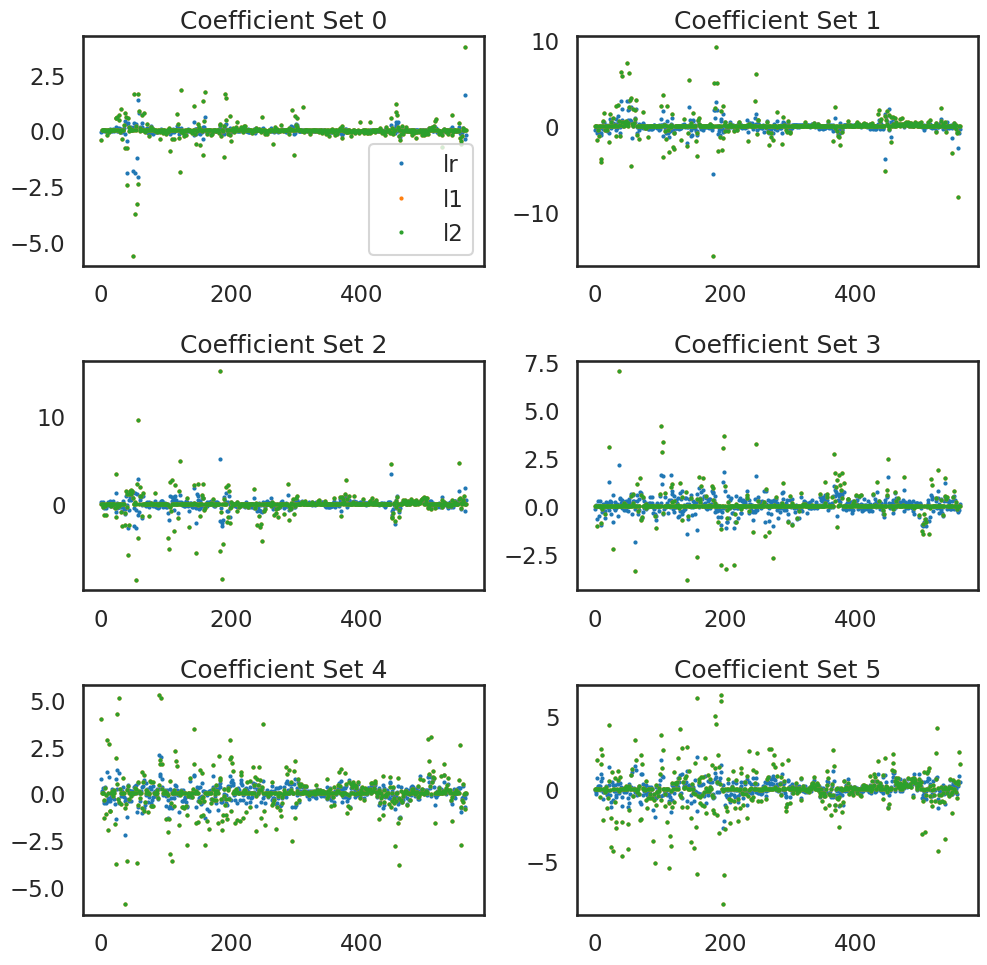

In [35]:
# creamos una figura para realizar un plot que tenga 3 renglones y 2 columnas. En cada una crearemos un plot
fig, axList = plt.subplots(nrows = 3, ncols = 2)

# flatten devuelve una copia del array colapsado a una única dimensión
axList = axList.flatten()

# se utiliza para establecer el tamaño de la figura en pulgadas
fig.set_size_inches(10,10)

# creamos una lista iterable de la forma (i,x) donde i es el indice de la iteracion y x es uno de los elementos de axList
for (i, ax) in enumerate(axList):

    # describimos la submatriz (subdataframe) localizada en loc
    data = coefficients.xs(i, level = 1, axis = 1)

    # usando el dataframe anterior, realizamos un plot en la posicion ax
    data.plot(marker = 'o', ls = '', ms = 2.0, ax = ax, legend = False)
    
    # describimos la leyenda en ax simpre que ax este en axList[0]
    if ax is axList[0]:        
        ax.legend(loc = 4)

    #  establecemos el titulo de nuestro plot  
    ax.set(title = "Coefficient Set " + str(i))


# tight_layout ajusta automáticamente los parametros del subplots para que los subplots encajen en el área de la figura.
plt.tight_layout()

$ \ $

----

## ***Question $(6)$***

$(1)$  Predict and store the class for each model.

In [36]:
# Creamos dos listas, donde vamos a describir cierto conjunto de datos
y_pred = []


# concatenamos los nombres de los modelos con los modelos
zip = [('lr', lr), ('l1', lr_l1), ('l2', lr_l1)]


#realizamos una iteracion sobre el zip creado anteriormente
for (name, model) in zip:

    # pegamos el conjunto de datos predecidos por el modelo en tipo serie. Recordar que los modelos ya estan entrenados.
    y_pred.append( pd.Series( model.predict(X_test), name = name ) )


# concatenamos los resultados de las listas anteriores
y_pred = pd.concat(y_pred, axis = 1)

# mostramos los primeros 5 resultados del datafrae y_pred
y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


$ \ $

$(2)$  Store the probability for the predicted class for each model.


In [37]:
# Creamos dos listas, donde vamos a describir cierto conjunto de datos
y_prob = []


# concatenamos los nombres de los modelos con los modelos
zip = [('lr', lr), ('l1', lr_l1), ('l2', lr_l1)]


#realizamos una iteracion sobre el zip creado anteriormente
for (name, model) in zip:

    # pegamos el conjunto de datos predecidos de probabilidad por el modelo en tipo serie. Recordar que los modelos ya estan entrenados.
    y_prob.append( pd.Series( model.predict_proba(X_test).max(axis = 1) , name = name ) )


# concatenamos los resultados de las listas anteriores
y_prob = pd.concat(y_prob, axis = 1)

# mostramos los primeros 5 resultados del datafrae y_prob
y_prob.head()

,lr,l1,l2
0,0.998939,0.998883,0.998883
1,0.988165,0.999513,0.999513
2,0.987592,0.995560,0.995560
3,0.981381,0.999192,0.999192
4,0.998277,0.999922,0.999922


$ \ $

----

## ***Question $(7)$***

For each model, calculate the following error metrics:

*   Accuracy

*   Precision

*   Recall

*   $F$ - score

Decide how to combine the multi-class metrics into a single value for each model.


In [38]:
# Creamos una lista vacia y la llenaremos adecuadamente
coefficients = []

# nombres de los modelos
coeff_labels = ['lr', 'l1', 'l2']

# modelos a tratar
coeff_models = [lr, lr_l1, lr_l2]

# concatenamos los nombres de los modelos con los modelos
zip = [('lr', lr), ('l1', lr_l1), ('l2', lr_l1)]

In [39]:
# creamos una lista vacia para irla llenando
metrics = []

# creamos un diccionario vacio para irlo llenando
cm = {}
 
# realizamos una iteracion sobre las cadenas ['lr', 'l1', 'l2']
for name in coeff_labels:

    # usamos la funcion score para describir precision, recall, fscore
    precision, recall, fscore, _ = score(y_test, y_pred[name], average = 'weighted')
    
    # usamos la funcion accuracy_score para obtener accuracy usando la data y_test, y_pred[name]
    accuracy = accuracy_score(y_test, y_pred[name])
    
    # Las puntuaciones de ROC-AUC se pueden calcular binarizando los datos
    etiquetas_test = label_binarize(y_test, classes = [0,1,2,3,4,5])
    etiquetas_pred = label_binarize(y_pred[name], classes = [0,1,2,3,4,5])
    auc = roc_auc_score(etiquetas_test, etiquetas_pred, average = 'weighted')
    
    # agregamos a nuestro diccionario cm la matriz de confusion en la data y_test, y_pred[name]
    cm[name] = confusion_matrix(y_test, y_pred[name])
    
    # agregaos a nuestra lista metrics el diccionario en forma de serie
    dicc = {'precision': precision, 'recall': recall, 'fscore': fscore, 'accuracy': accuracy, 'auc': auc}
    metrics.append(pd.Series(dicc, name = name))

In [40]:
# concatenamos los resultados obtenidos en la lista metrics 
metrics = pd.concat(metrics, axis = 1)

# mostramos en pantalla la descripcion de metrics
metrics

,lr,l1,l2
precision,0.984144,0.983514,0.983514
recall,0.984142,0.983495,0.983495
fscore,0.984143,0.983492,0.983492
accuracy,0.984142,0.983495,0.983495
auc,0.990384,0.989949,0.989949


$ \ $ 

----

## ***Question $(8)$***

Display or plot the confusion matrix for each model.


In [41]:
def Zip(X,Y):  
  if len(X) == len(Y):
    Zip = []
    for i in range(len(X)):
      Zip.append((X[i], Y[i]))
    return Zip

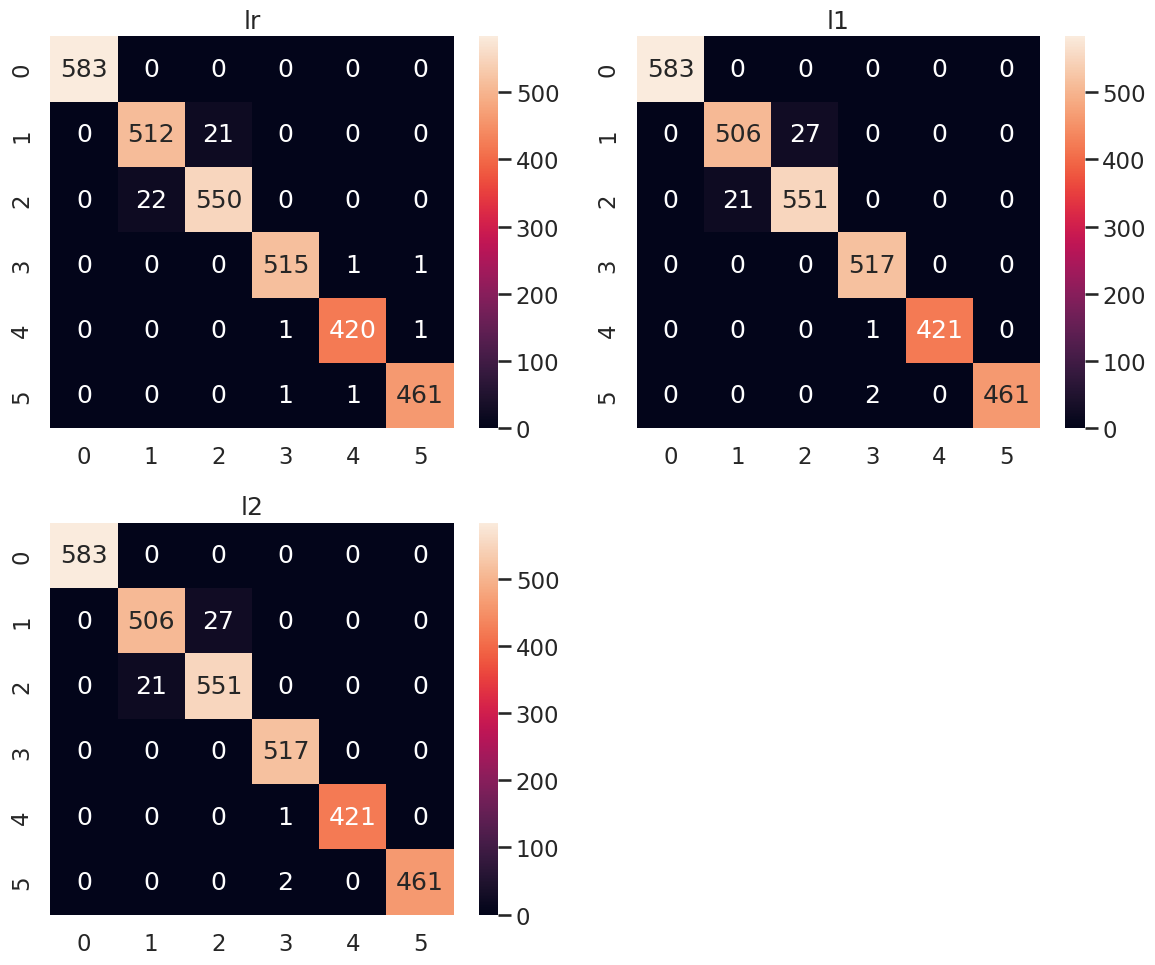

In [42]:
# creamos una figura donde realizaremos la grafica de varios plots (2 renglones y 2 columnas)
fig, axList = plt.subplots(nrows = 2, ncols = 2)

# flatten devuelve una copia del array colapsado a una única dimensión
axList = axList.flatten()
 
# describimos el tamaño de nuestra figura
fig.set_size_inches(12, 10)

# con este codigo no mostramos el cuarto plot
axList[-1].axis('off')

# realizamos una iteracion sobre la fusion entre axList[:-1], coeff_labels
for (ax, name) in Zip(axList[:-1], coeff_labels):

    # realizamos un mapa de calor sobre la matriz de confusion cm[name]
    sns.heatmap(cm[name], ax = ax, annot = True, fmt = 'd');

    # establecemos el titulo del subplot
    ax.set(title = name)

#  tight_layout ajusta automáticamente los parametros del subplots para que los subplots encajen en el área de la figura.
plt.tight_layout()